## Initialization

In [1]:
import unet, imageGeneration

## Create your network architecture
Generates 1000 training images and 30 test images together with labels

In [2]:
model = unet.create_unet()

Using TensorFlow backend.
C:\School\Årskurs 3\Kandidat\DeepTrack\DeepTrack 1.0\unet.py:60: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input=input, output=output)


## Create your batch

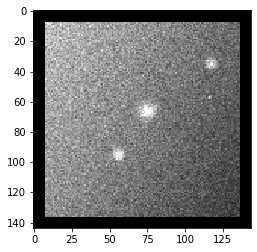

In [8]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
import imageio

imsize = (129,129,1)
xbatch = np.zeros((1000, 144, 144, 1))
ybatch = np.zeros((1000, 144, 144, 1))
padding_tuple = imageGeneration.get_padding(imsize[0:4], 4)


for i in range(1000):
    xdata = np.zeros(imsize)
    ydata = np.zeros(imsize)
    xdata[:,:,0] = imageio.imread('data/particles/train/image/' + str(i) + '.png') / 255
    xdata = np.pad(xdata,padding_tuple  + ((0,0),))
    if(i==0):
        plt.imshow(xdata[:,:,0], cmap='gray')
        plt.show()
    ydata[:,:,0] = imageio.imread('data/particles/train/label/' + str(i) + '.png') / 255
    ydata = np.pad(ydata,padding_tuple  + ((0,0),))
    xbatch[i,:,:,:] = xdata
    ybatch[i,:,:,:] = ydata

## Trains the network on 100 epochs and saves the best results

In [9]:
from keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint('unet_particle.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit(xbatch,ybatch, epochs = 100, callbacks = [model_checkpoint])


Epoch 1/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.5747 - accuracy: 0.9652

Epoch 00001: loss improved from inf to 0.57470, saving model to unet_particle.hdf5
Epoch 2/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0821 - accuracy: 0.9960: 0s - loss: 0.0879 - accu

Epoch 00002: loss improved from 0.57470 to 0.08206, saving model to unet_particle.hdf5
Epoch 3/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0340 - accuracy: 0.9966

Epoch 00003: loss improved from 0.08206 to 0.03399, saving model to unet_particle.hdf5
Epoch 4/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0289 - accuracy: 0.9966

Epoch 00004: loss improved from 0.03399 to 0.02886, saving model to unet_particle.hdf5
Epoch 5/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0279 - accuracy: 0.9966

Epoch 00005: loss improved from 0.02886 to 0.02791, saving model to unet_particle.hdf5
Epoch 6/100
1000/1000 [

Epoch 88/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0034 - accuracy: 0.9988

Epoch 00088: loss improved from 0.00342 to 0.00342, saving model to unet_particle.hdf5
Epoch 89/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0034 - accuracy: 0.9988

Epoch 00089: loss improved from 0.00342 to 0.00342, saving model to unet_particle.hdf5
Epoch 90/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0034 - accuracy: 0.9988

Epoch 00090: loss improved from 0.00342 to 0.00339, saving model to unet_particle.hdf5
Epoch 91/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0034 - accuracy: 0.9988

Epoch 00091: loss did not improve from 0.00339
Epoch 92/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0034 - accuracy: 0.9988

Epoch 00092: loss improved from 0.00339 to 0.00337, saving model to unet_particle.hdf5
Epoch 93/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.

## Trains the network using a generator

In [3]:
image_parameters_function = lambda : imageGeneration.get_image_parameters_optimized()
from keras.callbacks import ModelCheckpoint
### Define image generator
        
imggen = imageGeneration.batch_generator(image_parameters_function, 500)
        
model_checkpoint = ModelCheckpoint('unet_particle.hdf5', monitor='loss',verbose=1, save_best_only=True)

iteration = 0
for image_batch, target_batch in imggen:
    if(iteration>=50):
        break
    iteration+=1

    model.fit(image_batch, target_batch, epochs = 50, callbacks = [model_checkpoint])
    print("Iteration is " + str(iteration))

Am here
Epoch 1/50
500/500 [==============================] - 6s 12ms/step - loss: 0.6948 - accuracy: 0.7424

Epoch 00001: loss improved from inf to 0.69480, saving model to unet_particle.hdf5
Epoch 2/50
500/500 [==============================] - 2s 3ms/step - loss: 0.6926 - accuracy: 0.9154

Epoch 00002: loss improved from 0.69480 to 0.69260, saving model to unet_particle.hdf5
Epoch 3/50
500/500 [==============================] - 2s 3ms/step - loss: 0.6916 - accuracy: 0.9383

Epoch 00003: loss improved from 0.69260 to 0.69159, saving model to unet_particle.hdf5
Epoch 4/50
500/500 [==============================] - 2s 3ms/step - loss: 0.6907 - accuracy: 0.9609

Epoch 00004: loss improved from 0.69159 to 0.69068, saving model to unet_particle.hdf5
Epoch 5/50
500/500 [==============================] - 2s 3ms/step - loss: 0.6898 - accuracy: 0.9750

Epoch 00005: loss improved from 0.69068 to 0.68981, saving model to unet_particle.hdf5
Epoch 6/50
500/500 [==============================] - 2

500/500 [==============================] - 2s 3ms/step - loss: 0.0211 - accuracy: 0.9965

Epoch 00045: loss did not improve from 0.02102
Epoch 46/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0211 - accuracy: 0.9965

Epoch 00046: loss did not improve from 0.02102
Epoch 47/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0210 - accuracy: 0.9965

Epoch 00047: loss improved from 0.02102 to 0.02099, saving model to unet_particle.hdf5
Epoch 48/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0210 - accuracy: 0.9965

Epoch 00048: loss improved from 0.02099 to 0.02096, saving model to unet_particle.hdf5
Epoch 49/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0209 - accuracy: 0.9965

Epoch 00049: loss improved from 0.02096 to 0.02091, saving model to unet_particle.hdf5
Epoch 50/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0211 - accuracy: 0.9965

Epoch 00050: loss did not improve from 0.0209

500/500 [==============================] - 2s 3ms/step - loss: 0.0194 - accuracy: 0.9966

Epoch 00042: loss improved from 0.01971 to 0.01938, saving model to unet_particle.hdf5
Epoch 43/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0193 - accuracy: 0.9966

Epoch 00043: loss improved from 0.01938 to 0.01925, saving model to unet_particle.hdf5
Epoch 44/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0191 - accuracy: 0.9966

Epoch 00044: loss improved from 0.01925 to 0.01907, saving model to unet_particle.hdf5
Epoch 45/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0189 - accuracy: 0.9966

Epoch 00045: loss improved from 0.01907 to 0.01890, saving model to unet_particle.hdf5
Epoch 46/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0185 - accuracy: 0.9966

Epoch 00046: loss improved from 0.01890 to 0.01851, saving model to unet_particle.hdf5
Epoch 47/50
500/500 [==============================] - 2s 3ms/step 

500/500 [==============================] - 2s 3ms/step - loss: 0.0076 - accuracy: 0.9976

Epoch 00035: loss improved from 0.00773 to 0.00764, saving model to unet_particle.hdf5
Epoch 36/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0076 - accuracy: 0.9976

Epoch 00036: loss improved from 0.00764 to 0.00764, saving model to unet_particle.hdf5
Epoch 37/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0075 - accuracy: 0.9976

Epoch 00037: loss improved from 0.00764 to 0.00746, saving model to unet_particle.hdf5
Epoch 38/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0074 - accuracy: 0.9977

Epoch 00038: loss improved from 0.00746 to 0.00737, saving model to unet_particle.hdf5
Epoch 39/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0074 - accuracy: 0.9976

Epoch 00039: loss improved from 0.00737 to 0.00737, saving model to unet_particle.hdf5
Epoch 40/50
500/500 [==============================] - 2s 3ms/step 

500/500 [==============================] - 2s 3ms/step - loss: 0.0058 - accuracy: 0.9981

Epoch 00030: loss did not improve from 0.00578
Epoch 31/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0057 - accuracy: 0.9981

Epoch 00031: loss improved from 0.00578 to 0.00573, saving model to unet_particle.hdf5
Epoch 32/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0057 - accuracy: 0.9981

Epoch 00032: loss improved from 0.00573 to 0.00570, saving model to unet_particle.hdf5
Epoch 33/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0057 - accuracy: 0.9981

Epoch 00033: loss improved from 0.00570 to 0.00566, saving model to unet_particle.hdf5
Epoch 34/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0057 - accuracy: 0.9981

Epoch 00034: loss did not improve from 0.00566
Epoch 35/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0056 - accuracy: 0.9981

Epoch 00035: loss improved from 0.00566 to 0.

500/500 [==============================] - 2s 3ms/step - loss: 0.0056 - accuracy: 0.9981

Epoch 00031: loss did not improve from 0.00543
Epoch 32/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0056 - accuracy: 0.9981

Epoch 00032: loss did not improve from 0.00543
Epoch 33/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0056 - accuracy: 0.9981

Epoch 00033: loss did not improve from 0.00543
Epoch 34/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0056 - accuracy: 0.9981

Epoch 00034: loss did not improve from 0.00543
Epoch 35/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0056 - accuracy: 0.9981

Epoch 00035: loss did not improve from 0.00543
Epoch 36/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0056 - accuracy: 0.9981

Epoch 00036: loss did not improve from 0.00543
Epoch 37/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0056 - accuracy: 0.9981

Epoch 00037: los

500/500 [==============================] - 2s 3ms/step - loss: 0.0055 - accuracy: 0.9982

Epoch 00035: loss did not improve from 0.00542
Epoch 36/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0054 - accuracy: 0.9982

Epoch 00036: loss did not improve from 0.00542
Epoch 37/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0054 - accuracy: 0.9982

Epoch 00037: loss improved from 0.00542 to 0.00542, saving model to unet_particle.hdf5
Epoch 38/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0054 - accuracy: 0.9982

Epoch 00038: loss improved from 0.00542 to 0.00541, saving model to unet_particle.hdf5
Epoch 39/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0054 - accuracy: 0.9982

Epoch 00039: loss improved from 0.00541 to 0.00538, saving model to unet_particle.hdf5
Epoch 40/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0054 - accuracy: 0.9982

Epoch 00040: loss improved from 0.00538 to 0.

Epoch 34/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0050 - accuracy: 0.9983

Epoch 00034: loss improved from 0.00505 to 0.00503, saving model to unet_particle.hdf5
Epoch 35/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0050 - accuracy: 0.9983

Epoch 00035: loss improved from 0.00503 to 0.00500, saving model to unet_particle.hdf5
Epoch 36/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0050 - accuracy: 0.9983

Epoch 00036: loss did not improve from 0.00500
Epoch 37/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0050 - accuracy: 0.9983

Epoch 00037: loss did not improve from 0.00500
Epoch 38/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0050 - accuracy: 0.9983

Epoch 00038: loss did not improve from 0.00500
Epoch 39/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0050 - accuracy: 0.9983

Epoch 00039: loss did not improve from 0.00500
Epoch 40/50
500/500 [=====

500/500 [==============================] - 2s 3ms/step - loss: 0.0052 - accuracy: 0.9982

Epoch 00036: loss did not improve from 0.00489
Epoch 37/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0052 - accuracy: 0.9982

Epoch 00037: loss did not improve from 0.00489
Epoch 38/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0052 - accuracy: 0.9982

Epoch 00038: loss did not improve from 0.00489
Epoch 39/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0052 - accuracy: 0.9982

Epoch 00039: loss did not improve from 0.00489
Epoch 40/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0051 - accuracy: 0.9982

Epoch 00040: loss did not improve from 0.00489
Epoch 41/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0051 - accuracy: 0.9982

Epoch 00041: loss did not improve from 0.00489
Epoch 42/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0051 - accuracy: 0.9982

Epoch 00042: los

Epoch 41/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0050 - accuracy: 0.9983

Epoch 00041: loss did not improve from 0.00489
Epoch 42/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0049 - accuracy: 0.9983

Epoch 00042: loss did not improve from 0.00489
Epoch 43/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0049 - accuracy: 0.9983

Epoch 00043: loss did not improve from 0.00489
Epoch 44/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0049 - accuracy: 0.9983

Epoch 00044: loss improved from 0.00489 to 0.00488, saving model to unet_particle.hdf5
Epoch 45/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0049 - accuracy: 0.9983

Epoch 00045: loss improved from 0.00488 to 0.00486, saving model to unet_particle.hdf5
Epoch 46/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 0.9983

Epoch 00046: loss improved from 0.00486 to 0.00484, saving model to unet_

Epoch 39/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9985

Epoch 00039: loss improved from 0.00448 to 0.00448, saving model to unet_particle.hdf5
Epoch 40/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9985

Epoch 00040: loss did not improve from 0.00448
Epoch 41/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9984

Epoch 00041: loss did not improve from 0.00448
Epoch 42/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9985

Epoch 00042: loss did not improve from 0.00448
Epoch 43/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9985

Epoch 00043: loss improved from 0.00448 to 0.00446, saving model to unet_particle.hdf5
Epoch 44/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9985

Epoch 00044: loss improved from 0.00446 to 0.00444, saving model to unet_

500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.9984

Epoch 00042: loss did not improve from 0.00440
Epoch 43/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.9984

Epoch 00043: loss did not improve from 0.00440
Epoch 44/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.9984

Epoch 00044: loss did not improve from 0.00440
Epoch 45/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.9984

Epoch 00045: loss did not improve from 0.00440
Epoch 46/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.9984

Epoch 00046: loss did not improve from 0.00440
Epoch 47/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00047: loss did not improve from 0.00440
Epoch 48/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.9984

Epoch 00048: los

500/500 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9984

Epoch 00047: loss did not improve from 0.00440
Epoch 48/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9984

Epoch 00048: loss did not improve from 0.00440
Epoch 49/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9984

Epoch 00049: loss did not improve from 0.00440
Epoch 50/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9984

Epoch 00050: loss did not improve from 0.00440
Iteration is 12
Am here
Epoch 1/50
500/500 [==============================] - 2s 5ms/step - loss: 0.0055 - accuracy: 0.9982

Epoch 00001: loss did not improve from 0.00440
Epoch 2/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0054 - accuracy: 0.9982

Epoch 00002: loss did not improve from 0.00440
Epoch 3/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0054 - accuracy: 0.9

500/500 [==============================] - 2s 3ms/step - loss: 0.0052 - accuracy: 0.9983

Epoch 00002: loss did not improve from 0.00440
Epoch 3/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0051 - accuracy: 0.9983

Epoch 00003: loss did not improve from 0.00440
Epoch 4/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0051 - accuracy: 0.9983

Epoch 00004: loss did not improve from 0.00440
Epoch 5/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0051 - accuracy: 0.9983

Epoch 00005: loss did not improve from 0.00440
Epoch 6/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0051 - accuracy: 0.9983

Epoch 00006: loss did not improve from 0.00440
Epoch 7/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0051 - accuracy: 0.9983

Epoch 00007: loss did not improve from 0.00440
Epoch 8/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0050 - accuracy: 0.9983

Epoch 00008: loss did 

500/500 [==============================] - 2s 3ms/step - loss: 0.0053 - accuracy: 0.9982

Epoch 00007: loss did not improve from 0.00440
Epoch 8/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0053 - accuracy: 0.9982

Epoch 00008: loss did not improve from 0.00440
Epoch 9/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0053 - accuracy: 0.9982

Epoch 00009: loss did not improve from 0.00440
Epoch 10/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0053 - accuracy: 0.9982

Epoch 00010: loss did not improve from 0.00440
Epoch 11/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0052 - accuracy: 0.9982

Epoch 00011: loss did not improve from 0.00440
Epoch 12/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0052 - accuracy: 0.9982

Epoch 00012: loss did not improve from 0.00440
Epoch 13/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0052 - accuracy: 0.9982

Epoch 00013: loss 

500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.9983

Epoch 00012: loss did not improve from 0.00440
Epoch 13/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.9983

Epoch 00013: loss did not improve from 0.00440
Epoch 14/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.9983

Epoch 00014: loss did not improve from 0.00440
Epoch 15/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.9983

Epoch 00015: loss did not improve from 0.00440
Epoch 16/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.9983

Epoch 00016: loss did not improve from 0.00440
Epoch 17/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.9983

Epoch 00017: loss did not improve from 0.00440
Epoch 18/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.9983

Epoch 00018: los

500/500 [==============================] - 2s 3ms/step - loss: 0.0049 - accuracy: 0.9983

Epoch 00015: loss did not improve from 0.00427
Epoch 16/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0049 - accuracy: 0.9983

Epoch 00016: loss did not improve from 0.00427
Epoch 17/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0049 - accuracy: 0.9983

Epoch 00017: loss did not improve from 0.00427
Epoch 18/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0049 - accuracy: 0.9983

Epoch 00018: loss did not improve from 0.00427
Epoch 19/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0049 - accuracy: 0.9983

Epoch 00019: loss did not improve from 0.00427
Epoch 20/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0049 - accuracy: 0.9983

Epoch 00020: loss did not improve from 0.00427
Epoch 21/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 0.9983

Epoch 00021: los

500/500 [==============================] - 2s 3ms/step - loss: 0.0049 - accuracy: 0.9983

Epoch 00019: loss did not improve from 0.00427
Epoch 20/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 0.9983

Epoch 00020: loss did not improve from 0.00427
Epoch 21/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0049 - accuracy: 0.9983

Epoch 00021: loss did not improve from 0.00427
Epoch 22/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 0.9983

Epoch 00022: loss did not improve from 0.00427
Epoch 23/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 0.9983

Epoch 00023: loss did not improve from 0.00427
Epoch 24/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 0.9983

Epoch 00024: loss did not improve from 0.00427
Epoch 25/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 0.9983

Epoch 00025: los

500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.9983

Epoch 00024: loss did not improve from 0.00427
Epoch 25/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.9983

Epoch 00025: loss did not improve from 0.00427
Epoch 26/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.9984

Epoch 00026: loss did not improve from 0.00427
Epoch 27/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00027: loss did not improve from 0.00427
Epoch 28/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00028: loss did not improve from 0.00427
Epoch 29/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00029: loss did not improve from 0.00427
Epoch 30/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00030: los

500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00028: loss did not improve from 0.00427
Epoch 29/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9985

Epoch 00029: loss did not improve from 0.00427
Epoch 30/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00030: loss did not improve from 0.00427
Epoch 31/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00031: loss did not improve from 0.00427
Epoch 32/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00032: loss did not improve from 0.00427
Epoch 33/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00033: loss improved from 0.00427 to 0.00427, saving model to unet_particle.hdf5
Epoch 34/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0

500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00030: loss did not improve from 0.00407
Epoch 31/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00031: loss did not improve from 0.00407
Epoch 32/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00032: loss did not improve from 0.00407
Epoch 33/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00033: loss did not improve from 0.00407
Epoch 34/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9984

Epoch 00034: loss did not improve from 0.00407
Epoch 35/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00035: loss did not improve from 0.00407
Epoch 36/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9984

Epoch 00036: los

500/500 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9984

Epoch 00034: loss did not improve from 0.00407
Epoch 35/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9984

Epoch 00035: loss did not improve from 0.00407
Epoch 36/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9984

Epoch 00036: loss did not improve from 0.00407
Epoch 37/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9984

Epoch 00037: loss did not improve from 0.00407
Epoch 38/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9984

Epoch 00038: loss did not improve from 0.00407
Epoch 39/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9984

Epoch 00039: loss did not improve from 0.00407
Epoch 40/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9984

Epoch 00040: los

500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9984

Epoch 00039: loss did not improve from 0.00407
Epoch 40/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9985

Epoch 00040: loss did not improve from 0.00407
Epoch 41/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9984

Epoch 00041: loss did not improve from 0.00407
Epoch 42/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985: 0s - loss: 0.0043 - accu

Epoch 00042: loss did not improve from 0.00407
Epoch 43/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00043: loss did not improve from 0.00407
Epoch 44/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00044: loss did not improve from 0.00407
Epoch 45/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy

500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00043: loss did not improve from 0.00407
Epoch 44/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00044: loss did not improve from 0.00407
Epoch 45/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00045: loss did not improve from 0.00407
Epoch 46/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00046: loss did not improve from 0.00407
Epoch 47/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00047: loss did not improve from 0.00407
Epoch 48/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0042 - accuracy: 0.9985

Epoch 00048: loss did not improve from 0.00407
Epoch 49/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0042 - accuracy: 0.9985

Epoch 00049: los

500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9984

Epoch 00048: loss did not improve from 0.00407
Epoch 49/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9984

Epoch 00049: loss did not improve from 0.00407
Epoch 50/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9984

Epoch 00050: loss did not improve from 0.00407
Iteration is 25
Am here
Epoch 1/50
500/500 [==============================] - 2s 4ms/step - loss: 0.0053 - accuracy: 0.9983

Epoch 00001: loss did not improve from 0.00407
Epoch 2/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0051 - accuracy: 0.9983

Epoch 00002: loss did not improve from 0.00407
Epoch 3/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0051 - accuracy: 0.9983

Epoch 00003: loss did not improve from 0.00407
Epoch 4/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0050 - accuracy: 0.99

500/500 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 0.9984

Epoch 00002: loss did not improve from 0.00407
Epoch 3/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.9984

Epoch 00003: loss did not improve from 0.00407
Epoch 4/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00004: loss did not improve from 0.00407
Epoch 5/50
500/500 [==============================] - ETA: 0s - loss: 0.0047 - accuracy: 0.99 - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00005: loss did not improve from 0.00407
Epoch 6/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00006: loss did not improve from 0.00407
Epoch 7/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00007: loss did not improve from 0.00407
Epoch 8/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 

500/500 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 0.9984

Epoch 00005: loss did not improve from 0.00400
Epoch 6/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 0.9984

Epoch 00006: loss did not improve from 0.00400
Epoch 7/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.9984

Epoch 00007: loss did not improve from 0.00400
Epoch 8/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.9984

Epoch 00008: loss did not improve from 0.00400
Epoch 9/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.9984

Epoch 00009: loss did not improve from 0.00400
Epoch 10/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00010: loss did not improve from 0.00400
Epoch 11/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00011: loss di

500/500 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 0.9984: 0s - loss: 0.0048 - accuracy: 

Epoch 00010: loss did not improve from 0.00400
Epoch 11/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 0.9983

Epoch 00011: loss did not improve from 0.00400
Epoch 12/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 0.9984

Epoch 00012: loss did not improve from 0.00400
Epoch 13/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 0.9984

Epoch 00013: loss did not improve from 0.00400
Epoch 14/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 0.9984

Epoch 00014: loss did not improve from 0.00400
Epoch 15/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.9984

Epoch 00015: loss did not improve from 0.00400
Epoch 16/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - ac

500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9985

Epoch 00014: loss did not improve from 0.00400
Epoch 15/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9985

Epoch 00015: loss did not improve from 0.00400
Epoch 16/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00016: loss did not improve from 0.00400
Epoch 17/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985: 1s - loss: 0.0

Epoch 00017: loss did not improve from 0.00400
Epoch 18/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00018: loss did not improve from 0.00400
Epoch 19/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00019: loss did not improve from 0.00400
Epoch 20/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985



500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00016: loss did not improve from 0.00386
Epoch 17/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9984

Epoch 00017: loss did not improve from 0.00386
Epoch 18/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9984

Epoch 00018: loss did not improve from 0.00386
Epoch 19/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9984

Epoch 00019: loss did not improve from 0.00386
Epoch 20/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9984

Epoch 00020: loss did not improve from 0.00386
Epoch 21/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9984

Epoch 00021: loss did not improve from 0.00386
Epoch 22/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9984

Epoch 00022: los

500/500 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9985: 0s - loss: 0.0044 - accuracy: 

Epoch 00020: loss did not improve from 0.00386
Epoch 21/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9984

Epoch 00021: loss did not improve from 0.00386
Epoch 22/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9985

Epoch 00022: loss did not improve from 0.00386
Epoch 23/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9984

Epoch 00023: loss did not improve from 0.00386
Epoch 24/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9985

Epoch 00024: loss did not improve from 0.00386
Epoch 25/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9985

Epoch 00025: loss did not improve from 0.00386
Epoch 26/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - ac

Epoch 24/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00024: loss did not improve from 0.00386
Epoch 25/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9984

Epoch 00025: loss did not improve from 0.00386
Epoch 26/50
500/500 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 0.99 - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9984

Epoch 00026: loss did not improve from 0.00386
Epoch 27/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9984

Epoch 00027: loss did not improve from 0.00386
Epoch 28/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9984

Epoch 00028: loss did not improve from 0.00386
Epoch 29/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9984

Epoch 00029: loss did not improve from 0.00386
Epoch 30/50
500/500 [==============================] - 2s 3ms/st

500/500 [==============================] - 2s 3ms/step - loss: 0.0042 - accuracy: 0.9985

Epoch 00028: loss did not improve from 0.00386
Epoch 29/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0042 - accuracy: 0.9985

Epoch 00029: loss did not improve from 0.00386
Epoch 30/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0041 - accuracy: 0.9985

Epoch 00030: loss did not improve from 0.00386
Epoch 31/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0042 - accuracy: 0.9985

Epoch 00031: loss did not improve from 0.00386
Epoch 32/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0042 - accuracy: 0.9985

Epoch 00032: loss did not improve from 0.00386
Epoch 33/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0041 - accuracy: 0.9985

Epoch 00033: loss did not improve from 0.00386
Epoch 34/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0041 - accuracy: 0.9985

Epoch 00034: los

500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9984

Epoch 00032: loss did not improve from 0.00386
Epoch 33/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00033: loss did not improve from 0.00386
Epoch 34/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00034: loss did not improve from 0.00386
Epoch 35/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00035: loss did not improve from 0.00386
Epoch 36/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00036: loss did not improve from 0.00386
Epoch 37/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0042 - accuracy: 0.9985

Epoch 00037: loss did not improve from 0.00386
Epoch 38/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00038: los

500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00037: loss did not improve from 0.00386
Epoch 38/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0042 - accuracy: 0.9985

Epoch 00038: loss did not improve from 0.00386
Epoch 39/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0042 - accuracy: 0.9985

Epoch 00039: loss did not improve from 0.00386
Epoch 40/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0042 - accuracy: 0.9985

Epoch 00040: loss did not improve from 0.00386
Epoch 41/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0042 - accuracy: 0.9985

Epoch 00041: loss did not improve from 0.00386
Epoch 42/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0042 - accuracy: 0.9985

Epoch 00042: loss did not improve from 0.00386
Epoch 43/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0042 - accuracy: 0.9985

Epoch 00043: los

500/500 [==============================] - 2s 3ms/step - loss: 0.0041 - accuracy: 0.9985

Epoch 00042: loss did not improve from 0.00386
Epoch 43/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0042 - accuracy: 0.9985

Epoch 00043: loss did not improve from 0.00386
Epoch 44/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0042 - accuracy: 0.9985

Epoch 00044: loss did not improve from 0.00386
Epoch 45/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0041 - accuracy: 0.9985: 0s - loss: 0.0041 - accura

Epoch 00045: loss did not improve from 0.00386
Epoch 46/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0041 - accuracy: 0.9985

Epoch 00046: loss did not improve from 0.00386
Epoch 47/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0041 - accuracy: 0.9985

Epoch 00047: loss did not improve from 0.00386
Epoch 48/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0041 - accura

500/500 [==============================] - 2s 3ms/step - loss: 0.0041 - accuracy: 0.9986

Epoch 00046: loss did not improve from 0.00386
Epoch 47/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0041 - accuracy: 0.9986

Epoch 00047: loss did not improve from 0.00386
Epoch 48/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0041 - accuracy: 0.9986

Epoch 00048: loss did not improve from 0.00386
Epoch 49/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0041 - accuracy: 0.9986

Epoch 00049: loss did not improve from 0.00386
Epoch 50/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0041 - accuracy: 0.9986

Epoch 00050: loss did not improve from 0.00386
Iteration is 38
Am here
Epoch 1/50
500/500 [==============================] - 2s 4ms/step - loss: 0.0048 - accuracy: 0.9984

Epoch 00001: loss did not improve from 0.00386
Epoch 2/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.

500/500 [==============================] - 2s 3ms/step - loss: 0.0039 - accuracy: 0.9986

Epoch 00050: loss did not improve from 0.00386
Iteration is 39
Am here
Epoch 1/50
500/500 [==============================] - 2s 4ms/step - loss: 0.0049 - accuracy: 0.9984

Epoch 00001: loss did not improve from 0.00386
Epoch 2/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.9984

Epoch 00002: loss did not improve from 0.00386
Epoch 3/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00003: loss did not improve from 0.00386
Epoch 4/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00004: loss did not improve from 0.00386
Epoch 5/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00005: loss did not improve from 0.00386
Epoch 6/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9984

500/500 [==============================] - 2s 3ms/step - loss: 0.0049 - accuracy: 0.9983

Epoch 00004: loss did not improve from 0.00386
Epoch 5/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0049 - accuracy: 0.9984

Epoch 00005: loss did not improve from 0.00386
Epoch 6/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 0.9984

Epoch 00006: loss did not improve from 0.00386
Epoch 7/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 0.9984

Epoch 00007: loss did not improve from 0.00386
Epoch 8/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 0.9984

Epoch 00008: loss did not improve from 0.00386
Epoch 9/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0049 - accuracy: 0.9983

Epoch 00009: loss did not improve from 0.00386
Epoch 10/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.9984

Epoch 00010: loss did

500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.9984

Epoch 00009: loss did not improve from 0.00386
Epoch 10/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00010: loss did not improve from 0.00386
Epoch 11/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00011: loss did not improve from 0.00386
Epoch 12/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00012: loss did not improve from 0.00386
Epoch 13/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00013: loss did not improve from 0.00386
Epoch 14/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00014: loss did not improve from 0.00386
Epoch 15/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00015: los

500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00013: loss did not improve from 0.00386
Epoch 14/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00014: loss did not improve from 0.00386
Epoch 15/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00015: loss did not improve from 0.00386
Epoch 16/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00016: loss did not improve from 0.00386
Epoch 17/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00017: loss did not improve from 0.00386
Epoch 18/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9984

Epoch 00018: loss did not improve from 0.00386
Epoch 19/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0046 - accuracy: 0.9985

Epoch 00019: los

500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9984: 0s - loss: 0.0046 - 

Epoch 00018: loss did not improve from 0.00386
Epoch 19/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9985

Epoch 00019: loss did not improve from 0.00386
Epoch 20/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00020: loss did not improve from 0.00386
Epoch 21/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00021: loss did not improve from 0.00386
Epoch 22/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00022: loss did not improve from 0.00386
Epoch 23/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00023: loss did not improve from 0.00386
Epoch 24/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.

500/500 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 0.9983

Epoch 00022: loss did not improve from 0.00386
Epoch 23/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 0.9983

Epoch 00023: loss did not improve from 0.00386
Epoch 24/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 0.9984

Epoch 00024: loss did not improve from 0.00386
Epoch 25/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 0.9983

Epoch 00025: loss did not improve from 0.00386
Epoch 26/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0048 - accuracy: 0.9984

Epoch 00026: loss did not improve from 0.00386
Epoch 27/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.9984

Epoch 00027: loss did not improve from 0.00386
Epoch 28/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0047 - accuracy: 0.9984

Epoch 00028: los

500/500 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9984

Epoch 00027: loss did not improve from 0.00386
Epoch 28/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0045 - accuracy: 0.9984

Epoch 00028: loss did not improve from 0.00386
Epoch 29/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9984

Epoch 00029: loss did not improve from 0.00386
Epoch 30/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9984

Epoch 00030: loss did not improve from 0.00386
Epoch 31/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9984

Epoch 00031: loss did not improve from 0.00386
Epoch 32/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9984

Epoch 00032: loss did not improve from 0.00386
Epoch 33/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9984

Epoch 00033: los

500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00032: loss did not improve from 0.00386
Epoch 33/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0044 - accuracy: 0.9985

Epoch 00033: loss did not improve from 0.00386
Epoch 34/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9984

Epoch 00034: loss did not improve from 0.00386
Epoch 35/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00035: loss did not improve from 0.00386
Epoch 36/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00036: loss did not improve from 0.00386
Epoch 37/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00037: loss did not improve from 0.00386
Epoch 38/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0043 - accuracy: 0.9985

Epoch 00038: los

500/500 [==============================] - 2s 3ms/step - loss: 0.0042 - accuracy: 0.9985

Epoch 00036: loss did not improve from 0.00386
Epoch 37/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0042 - accuracy: 0.9985

Epoch 00037: loss did not improve from 0.00386
Epoch 38/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0042 - accuracy: 0.9985

Epoch 00038: loss did not improve from 0.00386
Epoch 39/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0042 - accuracy: 0.9985

Epoch 00039: loss did not improve from 0.00386
Epoch 40/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0042 - accuracy: 0.9985

Epoch 00040: loss did not improve from 0.00386
Epoch 41/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0041 - accuracy: 0.9985

Epoch 00041: loss did not improve from 0.00386
Epoch 42/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0041 - accuracy: 0.9985

Epoch 00042: los

500/500 [==============================] - 2s 3ms/step - loss: 0.0041 - accuracy: 0.9985

Epoch 00040: loss did not improve from 0.00386
Epoch 41/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0041 - accuracy: 0.9985

Epoch 00041: loss did not improve from 0.00386
Epoch 42/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0041 - accuracy: 0.9985

Epoch 00042: loss did not improve from 0.00386
Epoch 43/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0041 - accuracy: 0.9985

Epoch 00043: loss did not improve from 0.00386
Epoch 44/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0040 - accuracy: 0.9985: 0s - loss: 0.0041 - accu

Epoch 00044: loss did not improve from 0.00386
Epoch 45/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0040 - accuracy: 0.9985

Epoch 00045: loss did not improve from 0.00386
Epoch 46/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0040 - accuracy

500/500 [==============================] - 2s 3ms/step - loss: 0.0040 - accuracy: 0.9986

Epoch 00044: loss did not improve from 0.00386
Epoch 45/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0039 - accuracy: 0.9986

Epoch 00045: loss did not improve from 0.00386
Epoch 46/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0039 - accuracy: 0.9986

Epoch 00046: loss did not improve from 0.00386
Epoch 47/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0039 - accuracy: 0.9986

Epoch 00047: loss did not improve from 0.00386
Epoch 48/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0039 - accuracy: 0.9986

Epoch 00048: loss did not improve from 0.00386
Epoch 49/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0039 - accuracy: 0.9986

Epoch 00049: loss did not improve from 0.00386
Epoch 50/50
500/500 [==============================] - 2s 3ms/step - loss: 0.0039 - accuracy: 0.9986

Epoch 00050: los

## Tests the network on the movie

In [10]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
import cv2

im = io.imread('bild.tif')/255
print(im.shape)


batch = np.zeros(im.shape+(1,))
batch[:,:,:,0] = im
batch = np.pad(batch, ((0,0),(4,4),(0,0),(0,0)))
print(batch.shape)
model = unet.create_unet()
model.load_weights("unet_particle.hdf5")
A = model.predict(batch)
print(A.shape)
#Shows the first 10 images
for j in range(2):
    labelimage = A[j, :, :, 0]
    image = im[j]
    cv2.imwrite("data\particles\movie\label\label" + str(j) + '.png', labelimage*255)
    cv2.imwrite("data\particles\movie\frame\frame" + str(j) + ".png", im*255)


(1000, 312, 512)
(1000, 320, 512, 1)
(1000, 320, 512, 1)


error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:668: error: (-215:Assertion failed) image.channels() == 1 || image.channels() == 3 || image.channels() == 4 in function 'cv::imwrite_'


## Tests the network on the movie

KeyboardInterrupt: 

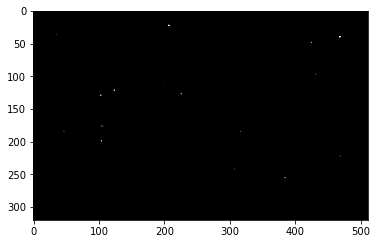

In [16]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
import cv2

#Shows the first 10 images
for j in range(1000):
    labelimage = A[j, :, :, 0]
    image = im[j]
    plt.imshow(image, cmap='gray')
    plt.savefig("data/particles/movie/frame/frame" + str(j) + ".png")
    plt.imshow(labelimage, cmap='gray')
    plt.savefig("data/particles/movie/label/label" + str(j) + ".png")

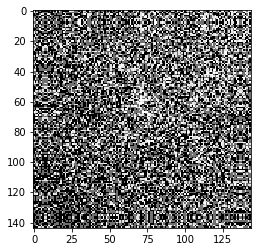

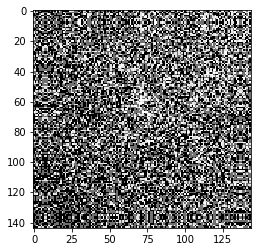

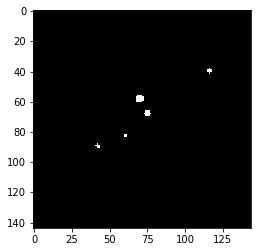

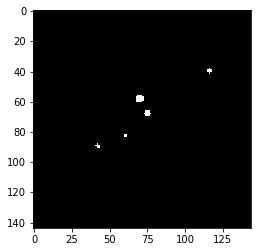

In [5]:
import imageio
from matplotlib import pyplot as plt
import imageGeneration

i = 16

im = imageio.imread('data/particles/train/image/' + str(i) + '.png') / 255
plt.imshow(im, cmap='gray')
plt.show()
im = imageGeneration.get_image_with_padding(im)
plt.imshow(im, cmap='gray')
plt.show()

im = imageio.imread('data/particles/train/label/' + str(i) + '.png') / 255
plt.imshow(im, cmap='gray')
plt.show()
im = imageGeneration.get_image_with_padding(im)
plt.imshow(im, cmap='gray')
plt.show()